## Assignment 2
### Ryan Quek 81771206

#### Question 1


<b> Find R1, R2 and C1/C2's indifference conditions </b>

We start by finding R1's indifference condition, followed by R2 and both C1/C2's indifference conditions.


In [43]:
using SymPy, Plots

# Define symbolic variables
pi, beta = symbols("pi beta", real=true, positive=true)
rho_1, rho_2 = symbols("rho_1 rho_2", real=true, positive=true)

# Indifference Condition for R1. This has to take into account R2's success rate of sending packets out in the first place.
R1eq = (1 - (rho_2*beta)) + (rho_2*beta*1/2) - 
    ((1 - rho_2)*(beta*1/2*beta) + (1 - (1 - rho_2)*beta)*beta)




      2                                                            
  beta *(1 - rho_2)   beta*rho_2                                   
- ----------------- - ---------- - beta*(-beta*(1 - rho_2) + 1) + 1
          2               2                                        

In [44]:
# Indifference Condition for R2. The chance of transmission (beta) is removed as it applies to both sides.
R2eq = rho_1*1/2 + (1-rho_1) - ((rho_1)*beta+(1-rho_1)*beta*1/2)

              beta*(1 - rho_1)   rho_1    
-beta*rho_1 - ---------------- - ----- + 1
                     2             2      

In [45]:
#We can solve for the Nash Equilibrium here, 
nash_equilibrium = solve([R1eq, R2eq], [rho_1, rho_2])

Dict(nash_equilibrium)


Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 2 entries:
  rho_2 => (beta^2 - 2*beta + 2)/(beta^2 + beta)
  rho_1 => (2 - beta)/(beta + 1)

In [46]:
#Indifference condition for C1 and C2 (symmetric problem)
#expr1 refers to the expected probability of success if you pick router 1
expr1 = rho_1*(1 - (rho_2*beta)) + rho_1*(rho_2*beta*1/2) + 
((1 - rho_1)*(1 - rho_2)*(beta*1/2*beta) + (1 - rho_1)*(1 - (1 - rho_2)*beta)*beta)

#expr2 refers to the expected probability of success if you pick router 2.
expr2 = beta*(rho_2*rho_1*1/2 + (1-rho_1)*rho_2 + ((rho_1)*(1-rho_2)*beta+(1-rho_1)*(1-rho_2)*beta*1/2))

Ceq=(pi)*1/2*(expr1)+(1-pi)*(expr1)-((pi)*(expr2)+((1-pi))*(expr2)*1/2)

CNash = solve([R1eq,R2eq,Ceq],[pi,rho_1,rho_2])

solution = CNash[1] 
equilibrium = Dict([pi, rho_1, rho_2] .=> solution)




Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 3 entries:
  pi    => -(5*beta - 8)/(2*(beta + 2))
  rho_2 => (beta^2 - 2*beta + 2)/(beta*(beta + 1))
  rho_1 => -(beta - 2)/(beta + 1)

In [47]:
pi_sol = equilibrium[pi]
rho_1_sol = equilibrium[rho_1]
rho_2_sol = equilibrium[rho_2]

    2             
beta  - 2*beta + 2
------------------
 beta*(beta + 1)  

With the Nash Equilibrium, we can then analyse how it looks when the value of beta changes. 

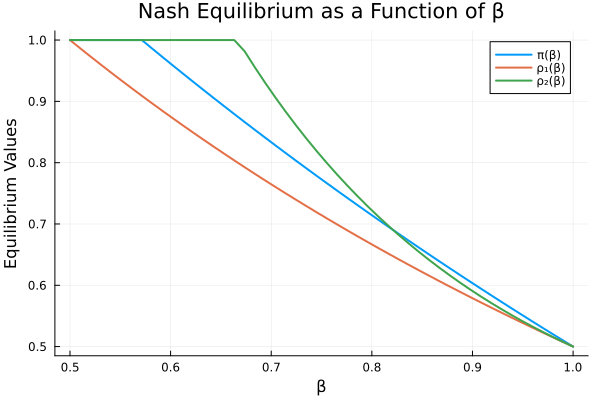

In [104]:
# Define a range of beta values
beta_vals = range(0.5, 1, length=50)


# Plot the results
plot(beta_vals, min(pi_sol,1), label="π(β)", linewidth=2)
plot!(beta_vals, min(rho_1_sol,1), label="ρ₁(β)", linewidth=2)
plot!(beta_vals, min(rho_2_sol,1), label="ρ₂(β)", linewidth=2)
xlabel!("β")
ylabel!("Equilibrium Values")
title!("Nash Equilibrium as a Function of β")



This tells us that when beta is equal to 1/2 or less, it's a strictly dominated strategy, where computers always send to R1.
The routers will also send it to R3. 

Logically, it would make sense, because if β is lower than 0.5, you rather a 0.5 chance of a successful packet sending out of R1 rather than a lower probability when you send it to R2 with no congestion.

Similarly, as β goes to 1, R4 starts to function like R3, and as such, the probabilities converge to half, since it is a symmetrical game.

We then calculate the expected number of packets. This is where my solutions start to look odd.

In [87]:
#expr1 refers to the expected probability of success if you pick router 1
expr1_sol = rho_1_sol*(1 - (rho_2_sol*beta)) + rho_1_sol*(rho_2_sol*beta*1/2) + 
((1 - rho_1_sol)*(1 - rho_2_sol)*(beta*1/2*beta) + (1 - rho_1_sol)*(1 - (1 - rho_2_sol)*beta)*beta)



      /        2             \                                                 >
    2 |    beta  - 2*beta + 2| /beta - 2    \                                  >
beta *|1 - ------------------|*|-------- + 1|        /       /        2        >
      \     beta*(beta + 1)  / \beta + 1    /        |       |    beta  - 2*be >
--------------------------------------------- + beta*|- beta*|1 - ------------ >
                      2                              \       \     beta*(beta  >
                                                                               >

>                               /        2             \                       >
>                               |    beta  - 2*beta + 2|                       >
>       \    \                  |1 - ------------------|*(beta - 2)            >
> ta + 2|    | /beta - 2    \   \         beta + 1     /              (beta -  >
> ------| + 1|*|-------- + 1| - ----------------------------------- - -------- >
> + 1)  /    / \beta + 1   

In [88]:
#expr2 refers to the expected probability of success if you pick router 2.
expr2_sol = beta*(rho_2_sol*rho_1_sol*1/2 + (1-rho_1_sol)*rho_2_sol + ((rho_1_sol)*(1-rho_2_sol)*beta+(1-rho_1_sol)*(1-rho_2_sol)*beta*1/2))



     /       /        2             \                   /        2             >
     |       |    beta  - 2*beta + 2|                   |    beta  - 2*beta +  >
     |  beta*|1 - ------------------|*(beta - 2)   beta*|1 - ----------------- >
     |       \     beta*(beta + 1)  /                   \     beta*(beta + 1)  >
beta*|- ---------------------------------------- + --------------------------- >
     |                  beta + 1                                        2      >
     \                                                                         >

>  \                                                                           >
> 2| /beta - 2    \                                     /beta - 2    \ /    2  >
> -|*|-------- + 1|              /    2             \   |-------- + 1|*\beta   >
>  / \beta + 1    /   (beta - 2)*\beta  - 2*beta + 2/   \beta + 1    /         >
> ----------------- - ------------------------------- + ---------------------- >
>                          

The expected packets would look something like this. The scenarios are: 
1. Both go to R1, which means congestion, and only one packet is sent to R3 or R4.
2. Both go to R2, which means congestion, and only one packet is sent to R3 or R4 (subject to the probability of beta of R2 sending successfully).
3. One goes to R1 and one goes to R2. This means both packets are in play, and we calculate by looking at the success of using Router 1 and success of using Router 2.

Note: This is where the code starts to turn in odd results. I first get a flatline (constant expected packets?), which would then cause the differentiation to get a 0 gradient. I'm not entirely sure if I can rely on the final calculation of 32% but this is what I have.

In [89]:
#The expected packets would look something like this.
exp = (pi_sol^2)*((rho_1_sol)+((1-rho_1_sol)*beta))+((1-pi_sol)^2)*(rho_2_sol*beta)*((1-rho_2_sol)*beta*beta)+(pi_sol)*(1-pi_sol)*(expr1_sol)+(pi_sol)*(1-pi_sol)*(expr2_sol)

simplify(exp)

        6           5           4           3           2                 
147*beta  - 545*beta  + 797*beta  - 630*beta  + 490*beta  - 288*beta + 128
--------------------------------------------------------------------------
                 /    4         3          2              \               
               4*\beta  + 6*beta  + 13*beta  + 12*beta + 4/               

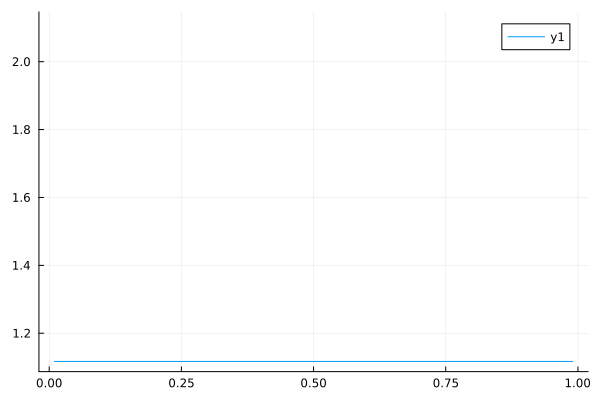

In [94]:
plot(exp(beta => 1/2), 0.01,.99)

The code below follows the template. However, there is an issue with it due to the flat line above. 

In [102]:
d=diff(exp,[pi,rho_1,rho_2])
best_regulated = solve(d,[pi,rho_1,rho_2])


Any[]

Although we get a 'flat line' for number of packets, we end up with a ratio of around 32% when we run the code. I believe the error originates from earlier.

In [101]:
1/exp([pi_sol] => best_regulated, beta => 1/5)


0.323903016476967

### Question 2

Note: This is an exact run of the code seen in the Ultimatum Game Julia notebook discussed in class, with tweaks made to correct the errors in the initial notebook, and also changing the filtering to just factor in those treatments with no limit.

I will add relevant comments, but I am not entirely sure about the log-likelihood function, although it seems we will be discussing this in the next class.

In [107]:
using DataFrames, CSV, Statistics, Chain
using Distributions,Optim, Plots
dataset = CSV.read("datamerged2.csv", DataFrame);

#filter the dataframe to find all the rows associated with treatment 1
# group these rows by theh proposer id
# combine the grouped rows then take the mean offer in each row
## the chain package above is used to convert tows of a dataframe into a vector (probably there are better ways to do this)
r0 = filter( row -> row.treatment ==1, dataset);
subset = groupby(r0, :id);
offs = combine(subset, :value => mean);
offers = @chain offs begin
    _.value_mean
end;

In [116]:
# repeat the operation abouve by filter out all the rejects, group by tofrom (thatis, the responders), group them then apply the minimum operation across each group
r1 = filter( row -> row.resp == 1, r0);
r = groupby(r1, :tofrom);
resp = combine(r, :value => minimum);
responses = @chain resp begin
   _.value_minimum
end;

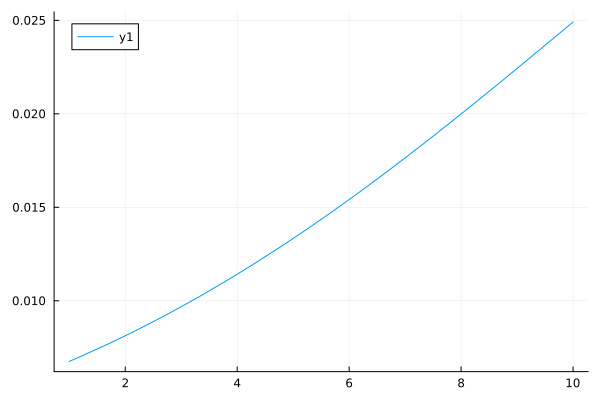

In [123]:
G = truncated(Normal(20, 10), 1, Inf)
plot(x -> pdf(G, x), 1, 10)
#Question: Was there a reason we limited the y-axis to 10? I note that you will see a normal looking distribution if you set the x axis to 55 instead. 

In [109]:
median(G)

#initialize
mu = 20 # mean for the distribution
sigma = 10 #variance
r = 2
K = 55
R = .5*K
alpha = 1/10

params = [mu, sigma, r, alpha]
params[1]

20.0

This is the probability of acceptance and its derivative. What we see is a huge kink, and if we impose a $10 floor on the bids, there is a very high probability of all offers being accepted. However, in real life, should the other party know that there is a $10 floor imposed, we might get different responses due to higher expectations.

I'm unclear what the $10 limit was referring to in the question. I assume in my above explanation that it is a floor, since that was what we had in the questions. If it is a limit (ie max the proposer can go), it means that the probability of accepting is low, and I do not expect the receivers' behaviour to change, unless they start expecting the opponent to give $10. 

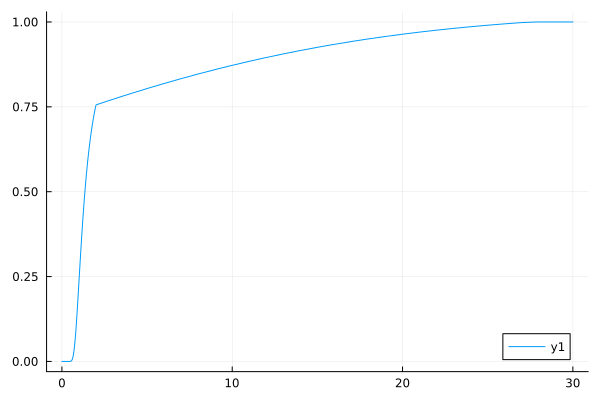

In [110]:
function Q(s, r, G,K)
    if s >= K/2
        return 1
    elseif s <= 0
        return 0
    elseif r <= 0
        return 0
    elseif s >= r
        return 1 - cdf(G, (r-s+K/2)/r)
    else
        return 1- cdf(G, K/(2*s))
    end
end
plot(x -> Q(x,r,G,K),0,30)

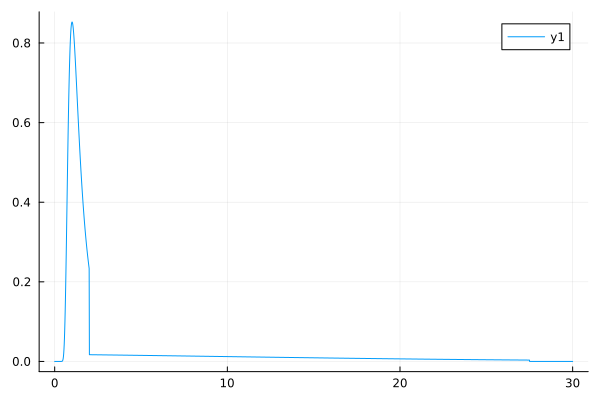

In [111]:
function dQ(s, r, G, K)
    if s >= K/2
      return 0
  elseif s <= 0
      return 0
  elseif r <= 0
      return 0
  elseif s >= r
      return  pdf(G, (r-s+K/2)/r)*1/r
  else
      return pdf(G, K/(2*s))*K/(2*s^2)
  end
end

plot(x -> dQ(x,r,G, K),0,30)

From this portion onwards, this code estimates the log likelihood function. For completeness in running the code, I have included it here, but I believe that these are not necessarily linked to answering the question.

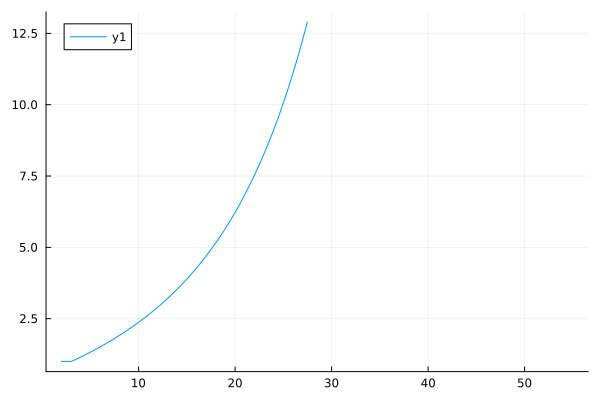

In [113]:
function type(s, r, G, alpha, K,R)
    return max(1,Q(s,r,G,K)*(1+2*alpha)/(R*dQ(s,r,G,K)) -(K/R)*(1+alpha)+ 1 + s*(1+2*alpha)/R)
end

type(r,r,G,alpha,K,R)

plot(x -> type(x,r,G,alpha,K,R),r,K)


In [114]:
at_one = 1- cdf(G,type(K/2,r,G,alpha,K,R))
#should be zero because there are no types high enough to do this.

function at_r(r,G,alpha,K,R)
    return max(cdf(G,type(r,r,G,alpha,K,R)),0)
end
at_r(r,G,alpha,K,R)

0.0

In [117]:
if length(responses) != length(offers)
    println("A data error - there are a different number of proposers and responders.  Possibly some responder rejected all offers, but more likely something wrong")
else
    println("Data Good")
end   

Data Good


In [118]:
function likelihood(params, offers, responses,K,R)
    G = truncated(Normal(params[1],params[2]), 1, Inf)
    l = 0
    for o in offers
        if o <= params[3]
            v = at_r(params[3],G,params[4],K,R)
            if v > 0
                l += log(v)
            else 
                l += log(.01)
            end
        else
            v = pdf(G,type(o,params[3],G,params[4],K,R))
            if v > 0
                l += log(v)
            else
                l += log(.01)
            end
        end
    end
    for k in responses
        l += log(1 - cdf(G, (params[3]-k+K/2)/params[3])+.01)
    end
    return -l
end

likelihood(params, offers,responses,K,R)

234.59447259763894

In [119]:
lower = [5,5,1.5,0]
upper = [Inf, Inf,2.5,5]
initial = [mu,sigma,2,.1]

res = optimize(params -> likelihood(params, offers, responses,K,R), lower, upper, initial, Fminbox())

 * Status: success

 * Candidate solution
    Final objective value:     1.827511e+02

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 6.98e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.52e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 6.35e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    3
    f(x) calls:    414
    ∇f(x) calls:   414


In [121]:
result = Optim.minimizer(res)

4-element Vector{Float64}:
 5.000000006354007
 7.0614245753632785
 2.499999999587194
 2.2753991574536085

In [122]:
likelihood(result, offers,responses,K,R)

182.75114694947956